In [0]:
# This is a stock price prediction model that is built using LSTM.
# We are going to take the stock price data of last 60 days of Apple to predict the future closing prices of the stock.

In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import math as m
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [224]:
#Load the data
df= data.DataReader('AAPL', data_source= 'yahoo', start= '2012-01-01', end= '2020-05-30')
#view data-frame
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-05-22,319.230011,315.350006,315.769989,318.890015,20450800.0,318.890015
2020-05-26,324.239990,316.500000,323.500000,316.730011,31380500.0,316.730011
2020-05-27,318.709991,313.089996,316.140015,318.109985,28236300.0,318.109985


In [225]:
#View the shape of data-frame
df.shape

(2115, 6)

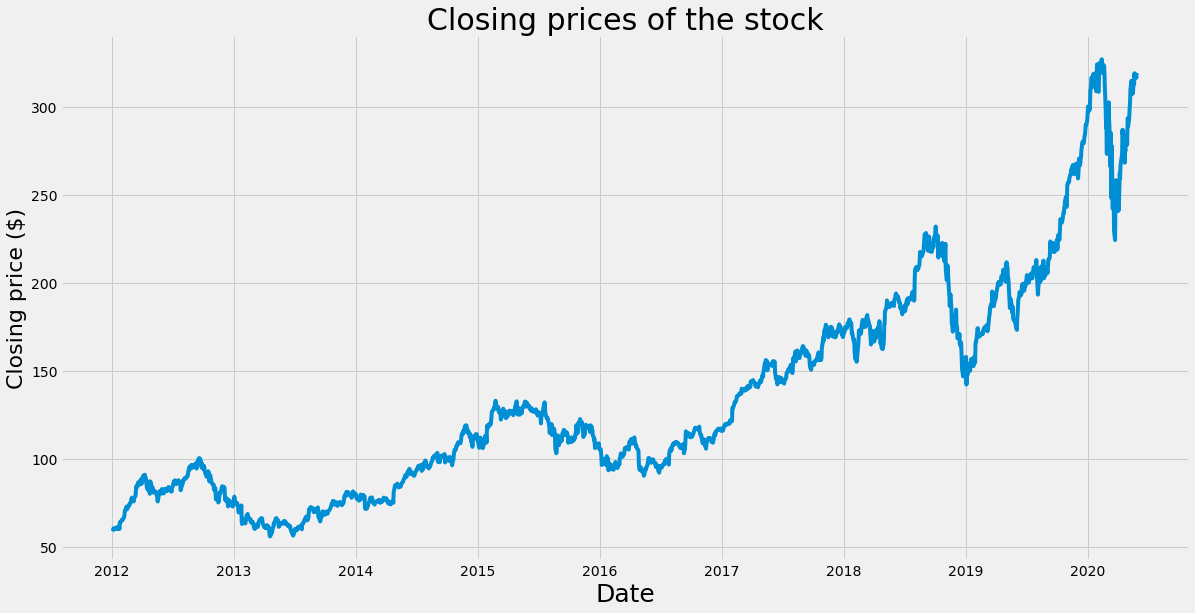

In [226]:
#Visualize the closing price
plt.figure(figsize= (18,9))
plt.title('Closing prices of the stock', fontsize= 30)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize= 25)
plt.ylabel('Closing price ($)', fontsize= 22)
plt.show()

In [227]:
#creating a data-frame having only closing prices of the stock
col_df= df.filter(['Close'])
#Never forget to put the square braces around the name of the column you want to print or elase it would return a null vector of shape (size,0)
#convert the data-frame to a numpy array
data_set= col_df.values
#partitioning the data-set for training
train_data_len= m.ceil(len(data_set) * 0.9)
#printing the size of the training set
train_data_len

1904

In [228]:
#scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data_set)
#print scaled_data
scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.96650814],
       [0.96702402],
       [0.96588184]])

In [229]:
#Create the scaled training data set
train_dataset = scaled_data[0:train_data_len , :]
#create the independent training variable x_train and dependent training variable y_train
x_train = []
y_train = []
#Append the past 60 days data to each entry of x_train the the corresponding data of the next day to y_train
for i in range (60 , len(train_dataset)) :
  x_train.append(train_dataset[i-60 : i , 0])
  y_train.append(train_dataset[i , 0])

  if i <= 62 :
    print(x_train)
    print()
    print(y_train)
    print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]

[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.0

In [0]:
#Converting the x_train and y_train data sets to numpy arrays for being able to input them in the LSTM models
x_train , y_train = np.array(x_train) , np.array(y_train)

In [231]:
#Reshape the 2D array x_train to a 3D array
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape

(1844, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50 , return_sequences = True , input_shape = (x_train.shape[1] , 1)))  #The input shape is equidimensional to the no. of time steps and features
model.add(LSTM(50 , return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [234]:
#Train the model
model.fit(x_train , y_train , batch_size = 20 , epochs = 6)

#After trying out several batch size and epoch combination like (1,1) , (20,10) , (5,10) etc. it turns out that we get better performance on training set and faster convergence with batch_size = 20 and epochs = 6

Epoch 1/6
1844/1844 [==============================] - 6s 3ms/step - loss: 0.0033
Epoch 2/6
1844/1844 [==============================] - 6s 3ms/step - loss: 3.4969e-04
Epoch 3/6
1844/1844 [==============================] - 6s 3ms/step - loss: 3.4142e-04
Epoch 4/6
1844/1844 [==============================] - 6s 3ms/step - loss: 2.7835e-04
Epoch 5/6
1844/1844 [==============================] - 6s 3ms/step - loss: 2.6743e-04
Epoch 6/6
1844/1844 [==============================] - 6s 3ms/step - loss: 2.6475e-04


In [0]:
#Create scaled test data set
test_dataset = scaled_data[train_data_len - 60 : , :]
#Create test set x_test and y_test
x_test = []
y_test = data_set[train_data_len : , :]
for i in range(60 , len(test_dataset)) :
  x_test.append(test_dataset[i-60 : i , 0])

In [0]:
#Create a numpy array of test data sets
x_test , y_test = np.array(x_test) , np.array(y_test)

In [0]:
#Reshape the x_test dataset
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

In [0]:
#Predict the values
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [239]:
#Show the RMS error of the predicted value
rms_error = np.sqrt(np.mean(prediction - y_test)**2)
rms_error

3.683699910674615

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


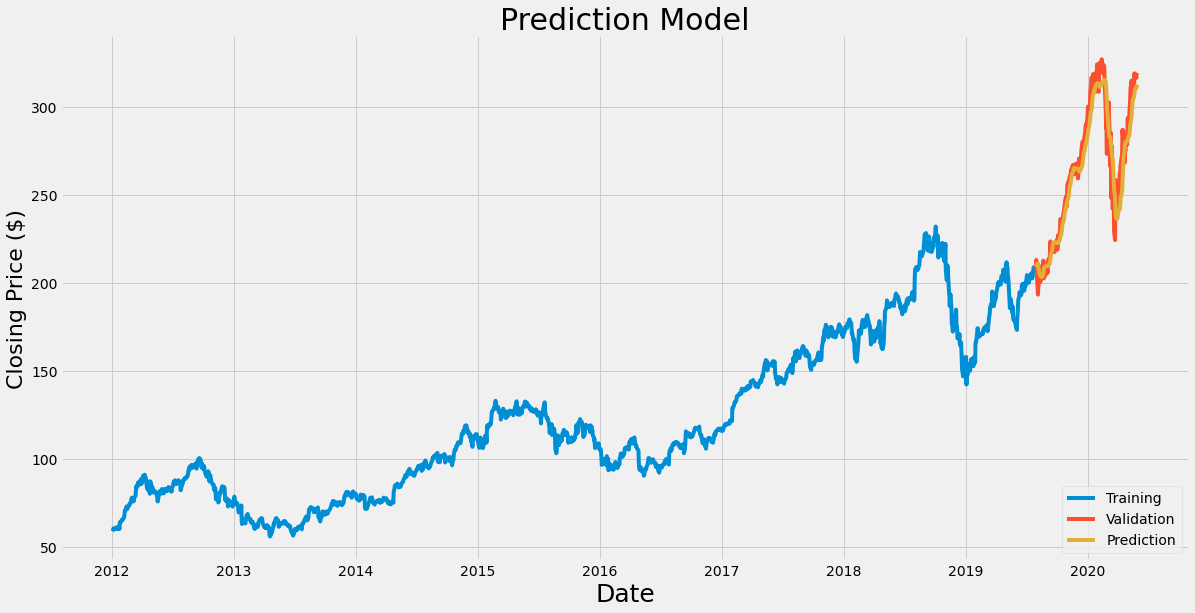

In [240]:
#Show the data
training = df[:train_data_len]
validation = df[train_data_len:]
validation['Prediction'] = prediction
#Visualize the data
plt.figure(figsize = (18,9))
plt.title('Prediction Model' , fontsize = 30)
plt.xlabel('Date' , fontsize = 25)
plt.ylabel('Closing Price ($)' , fontsize = 22)
plt.plot(training['Close'])
plt.plot(validation[['Close' , 'Prediction']])
plt.legend(['Training' , 'Validation' , 'Prediction'] , loc = 'lower right')
plt.show()

In [241]:
#Print the actual and predicted prices
validation[['Close' , 'Prediction']]

,Close,Prediction
Date,,
2019-07-30,208.779999,209.228180
2019-07-31,213.039993,209.732040
2019-08-01,208.429993,210.485229
2019-08-02,204.020004,210.981049
2019-08-05,193.339996,210.962540
...,...,...
2020-05-22,318.890015,310.073914
2020-05-26,316.730011,311.107605
2020-05-27,318.109985,311.824615




1.   The model was trained on last 90 days, 60 days and 30 days data separately and it was observed that training the model on last 60 days data yielded the best performance on the test set and commendable performance on the training set.
2.   When the model was trained on last 90 days data, it gave the best result on the training set and yielded a training set error of approximatelty 9.77 x 10^-5 and a test set error of approximately 3.8; when number of epochs were increased to 10 it gave a little better result on the training set but worse result of the test set. It was clearly because of overfitting.
3.   When the model was trained on last 30 days data the model performed poorly on the training set as well as test set compared to the others and yielded a training set error of around 3.8 x 10^-4 and a test set error of approximately 6.8, even changing the no of neurons in the LSTM to 20 or 25 and changing the no of neurons in the hidden feed-forward layer to 10 or 15 respectively didn't change the performance of the model much. So, clearly this model had a high bias and high variance.
4.   The best result was obtained with model that was trained on the last 60 days data as it has a training set error of 2.6475 x 10^-04 that is worse compared to the model mentioned in the second point but it also had a test set error of 3.683699910674615, that shows that this model was not overfitted like the former and was clearly not underfitted like the modelof the third point.
5.   So, it can be clearly said that the model that was trained on last 60 days data with training set having a mini-batch size of 20 and no of epochs equal to 6 has the best performance and the optimal bias and variance in this limited resource environment. 



